<a href="https://www.kaggle.com/code/dascient/kepler-exoplanet-classification-model?scriptVersionId=127759947" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Kepler Data Analysis

In [6]:
# lets begin!
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# kepler labled test & train
exoTest = pd.read_csv('/kaggle/input/kepler-labelled-time-series-data/exoTest.csv',header=0)
exoTrain = pd.read_csv('/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv',header=0)
cumulative = pd.read_csv('/kaggle/input/kepler-exoplanet-search-results/cumulative.csv',header=0)


/kaggle/input/kepler-exoplanet-search-results/cumulative.csv
/kaggle/input/kepler-labelled-time-series-data/exoTest.csv
/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv


In [13]:
# datasets
#exoTest.describe()#.style.background_gradient(cmap ='coolwarm').set_properties(**{'font-size': '8px'})
#exoTrain.describe()#.style.background_gradient(cmap ='coolwarm').set_properties(**{'font-size': '8px'})
#cumulative.describe()#.style.background_gradient(cmap ='coolwarm').set_properties(**{'font-size': '8px'})

In [14]:
# kepler target
# pairplot
#target = 'kepler_name'#'koi_disposition'
#sns.pairplot(df_encoded.sample(int(len(df_encoded/1000))),hue=target)
#sns.pairplot(df_encoded.sample(10),hue=target)

In [17]:
# Set up Xy Test & Train sets
X_train, X_test, y_train, y_test = exoTrain.drop(columns='LABEL'), exoTest.drop(columns='LABEL'), exoTrain.LABEL.values, exoTest.LABEL.values

In [19]:
len(y_train)

570

In [22]:
target = 'LABEL'

# classifier
#clf = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42).fit(X_train, y_train)
#clf = AdaBoostClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
clf = ExtraTreesClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
#clf = KNeighborsClassifier().fit(X_train, y_train)
#clf = MLPClassifier(alpha=1, max_iter=500).fit(X_train, y_train)

# results
train_predications = clf.predict(X_train)
train_score = clf.score(X_train, y_train)
predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)
train_matrix = confusion_matrix(y_train, train_predications)
test_matrix = confusion_matrix(y_test, predictions)
print("Target:",target)
print("TRAIN SCORE:",train_score)
print("TEST SCORE:",score)

Target: LABEL
TRAIN SCORE: 1.0
TEST SCORE: 0.9912280701754386


In [ ]:
matrix = pd.DataFrame(test_matrix)

matrix.style.background_gradient(cmap ='Spectral')\
        .set_properties(**{'font-size': '15px'})

<AxesSubplot:>

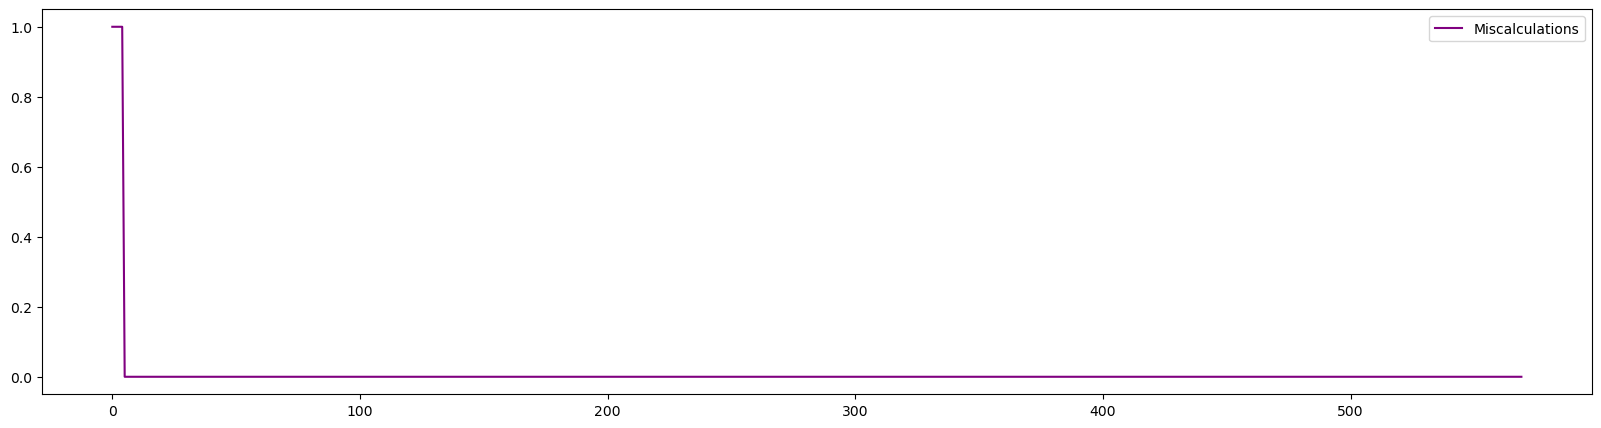

In [23]:
# noise
pd.DataFrame(y_test-clf.predict(X_test),columns=['Miscalculations']).plot(figsize=(20,5),c='purple')

In [24]:
import time

# iterator
def classification_feat_importance(df_encoded):
    
    # iterate through each column variable as classification targets
    for target in exoTrain.columns.values:
        time.sleep(30)
        
        # classifiers
        #clf1 = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42).fit(X_train, y_train)
        clf2 = AdaBoostClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
        #clf3 = ExtraTreesClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
        #clf4 = KNeighborsClassifier().fit(X_train, y_train)
        #clf5 = MLPClassifier(alpha=1, max_iter=500).fit(X_train, y_train)
        classifiers = [
                       #clf1, 
                       clf2, 
                       #clf3, 
                       #clf4, 
                       #clf5
                      ]

        for classifier in classifiers:
            results = []
            #test_matrix = confusion_matrix(y_test, clf.predict(X_test))
            results.append({"classifier":str(classifier).split("(")[0],"target":target,"test_score":classifier.score(X_test, y_test)})
            print("Classifier:",str(classifier).split("(")[0],"\t\tTarget:",target,"\tScore:",classifier.score(X_test, y_test))
            
    return pd.DataFrame(results)

In [ ]:
classification_feat_importance(df_encoded)

In [ ]:
# choose target variable
#target = input("Enter target variable: ")
target = 'kepler_name'#"koi_disposition"

# quick proof of concept
a = df.copy()

# find random sample
from random import randrange
idx = randrange(len(a))

# print random configuration item
b = pd.DataFrame(a.loc[idx]).T
print(f"{target}:",b.reset_index()[target][0])

# store sol'n
solution = b.reset_index()[target][0]

# print data point
b

In [ ]:
# categorize/encode entire dataframe(a)
def encode(df):
    lb_make = LabelEncoder()
    columns = df.columns.values.tolist()
    df_encoded = df[columns].copy()

    # categorize/encode
    for i in columns:
        df_encoded[i] = lb_make.fit_transform(df[i])

    # encoded
    return df_encoded

c = encode(a)
print("\nOriginal dataframe encoded.")

In [ ]:
# print encoded item
use_case = pd.DataFrame(c.loc[idx]).T.drop(columns=[target]) 
#c

# print encoded item w/out target info
data = c.drop(columns=[target]) 
use_case

In [ ]:
def X_y_sets(df, target):
    #X = df.dropna().drop(columns=[target]).copy()
    #y = df.dropna()[target].ravel().copy()
    
    # w.o dropna()
    X = df.drop(columns=[target]).copy()
    y = df.dropna()[target].ravel().copy()
    
    return train_test_split(X, y, test_size=0.33, random_state=42), X, y# save trainer
print("\nResetting train data...")
trainer = c.loc[c.index!=idx].dropna().copy()
X, y =  trainer.drop(columns=[target]), trainer[target].ravel()
X_train, X_test, y_train, y_test = X_y_sets(trainer, target)[0]

In [ ]:
# encoded variable re-mapping
def encoding_remap(df, df_encoded, target):
    
    X_test = X_y_sets(df, target)[0][0]
    
    remap = pd.merge(df_encoded.loc[df_encoded.index.isin(X_test.index.values)][target].reset_index(),
              df.loc[df.index.isin(X_test.index.values)][[target]].reset_index(),on=['index'])
    
    remap[target] = [str(remap[f'{target}_y'][i]) for i,v in remap[f'{target}_x'].items()]
    remap['index'] = np.array([str(remap[f'{target}_x'][i]) for i,v in remap[f'{target}_x'].items()]).astype(int)
    remap=remap[[target,'index']]
    remap = remap.set_index('index').drop_duplicates().sort_values('index')
    
    return remap

# specific to our current target choice
d = encoding_remap(a, c, target)

In [ ]:
print("\nLive prediction\n")

# choose classifier
#clf = GradientBoostingClassifier(criterion="friedman_mse", init=None, learning_rate=0.033, loss='deviance', max_depth=19, max_features=None, max_leaf_nodes=None, min_samples_leaf=60, min_samples_split=120, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=42, subsample=1.0, verbose=1, warm_start=False).fit(X_train, y_train)
#clf = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42).fit(X_train, y_train)
#clf = ExtraTreesClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
clf = AdaBoostClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
#clf = MLPClassifier(alpha=1, max_iter=500).fit(X_train, y_train)
#clf = KNeighborsClassifier().fit(X_train, y_train)


print()
print("Test score: ",clf.score(X_test, y_test))
print()
prediction = clf.predict(use_case)[0]
print(f"Prediction {target}:",prediction)


# print decoded prediction
print("\nPrediction Decoded")
e = d[d.index == prediction]
e

In [ ]:
if solution == e.reset_index()[target][0]:
    print("Machine's prediction was correct!")
else:
    print("Machine's prediction was incorrect :(")

- I believe the machine's inability to predict correctly is due to a class-oriented issue in the cell above in which I define the X_y_sets function. 
- I might be seeking @jasonifier as an SME to address this issue by uniquely debugging my code. Otherwise, feel free to comment as to why setting the X variable  [(df.dropna().drop(columns=[target]).copy()] returns an empty set - Despite having X_test.info() identifies each variable to be non-null's?
- I'll be attending to fix this as quickly as I can. 

# Supplementary

In [ ]:
# encoding
from sklearn.preprocessing import LabelEncoder
def encode(df):
    lb_make = LabelEncoder()
    columns = df.columns.values.tolist()
    df_encoded = df[columns].copy()

    # categorize/encode
    for i in columns:
        df_encoded[i] = lb_make.fit_transform(df[i])

    # encoded
    return df_encoded


# encoded variable re-mapping
def encoding_remap(df, df_encoded, target):
    
    X_test = X_y_sets(df, target)[0][0]
    
    remap = pd.merge(df_encoded.loc[df_encoded.index.isin(X_test.index.values)][target].reset_index(),
              df.loc[df.index.isin(X_test.index.values)][[target]].reset_index(),on=['index'])
    
    remap[target] = [str(remap[f'{target}_y'][i]) for i,v in remap[f'{target}_x'].items()]
    remap['index'] = np.array([str(remap[f'{target}_x'][i]) for i,v in remap[f'{target}_x'].items()]).astype(int)
    remap=remap[[target,'index']]
    remap = remap.set_index('index').drop_duplicates().sort_values('index')
    
    return remap


# pairplot
import seaborn as sns
def pairplot(df, target):
    return sns.pairplot(df.sample(int(len(df/10000))),hue=target)
    
    
# create X,y variables for ML
from sklearn.model_selection import train_test_split
def X_y_sets(df, target):
    X = df.dropna().drop(columns=[target]).copy()
    y = df.dropna()[target].ravel().copy()
    
    return train_test_split(X, y, test_size=0.33, random_state=42), X, y


# classifier iteration
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
def classification_feat_importance(df_encoded):
    
    df_encoded = df_encoded.drop(columns=['target1','target2'])
    
    # iterate through each column variable as classification targets
    for target in df_encoded.columns.values:
        X = df_encoded.dropna().drop(columns=[target]).copy()
        y = df_encoded.dropna()[target].ravel().copy()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        
        time.sleep(30)
        
        # classifiers
        clf1 = RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42).fit(X_train, y_train)
        clf2 = AdaBoostClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
        clf3 = ExtraTreesClassifier(n_estimators=200, random_state=42).fit(X_train, y_train)
        clf4 = KNeighborsClassifier().fit(X_train, y_train)
        clf5 = MLPClassifier(alpha=1, max_iter=500).fit(X_train, y_train)
        classifiers = [
                       clf1, 
                       clf2, 
                       clf3, 
                       clf4, 
                       clf5
                      ]

        for classifier in classifiers:
            results = []
            #test_matrix = confusion_matrix(y_test, clf.predict(X_test))
            results.append({"classifier":str(classifier).split("(")[0],"target":target,"test_score":classifier.score(X_test, y_test)})
            print("Classifier:",str(classifier).split("(")[0],"\t\tTarget:",target,"\tScore:",classifier.score(X_test, y_test))
            
    return pd.DataFrame(results)

## Variable Definitions & API Documentation
Data Columns in Kepler Objects of Interest Table <br>*https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html


Exoplanet Archive Application Programming Interface (API) User Guide
<br>*https://exoplanetarchive.ipac.caltech.edu/docs/program_interfaces.html

In [ ]:
#en fin